# Feature Selection:

Feature selection is the process of reducing the number of input variables when developing a predictive model.

# Feature Engineering:

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.



In [140]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('/content/Combined_DS_v10.csv')
df.shape

(999, 11)

In [48]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [52]:
df.isnull().sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                     334
dtype: int64

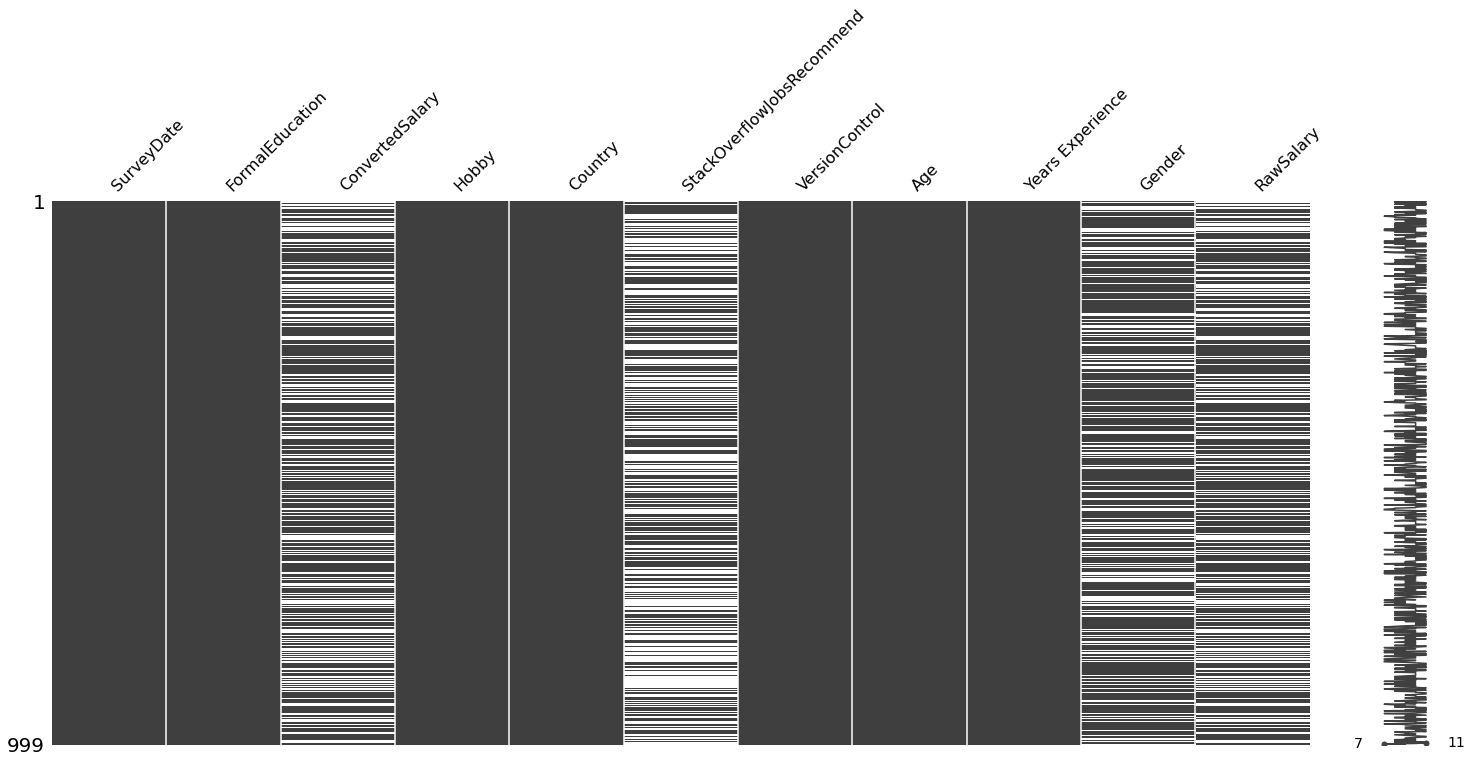

In [53]:
# missing values

msno.matrix(df)

In [60]:
df['ConvertedSalary'].mean()

92565.16992481203

In [61]:
df['ConvertedSalary'] = df['ConvertedSalary'].fillna(round(df['ConvertedSalary'].mean(),2))


In [62]:
df['ConvertedSalary'].isnull().sum()

0

In [63]:
df['ConvertedSalary'].dtype

dtype('float64')

# Featuer Selection using Correlation Matrix

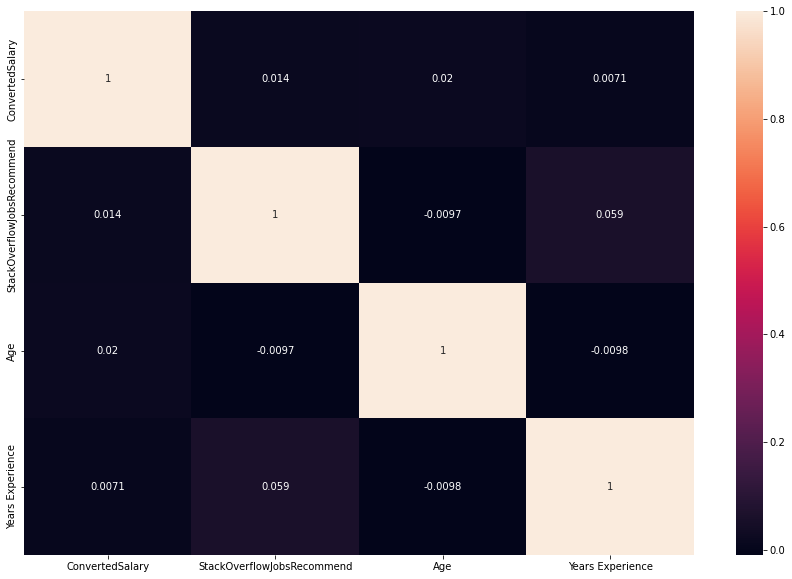

In [65]:
# Correlation Matrix

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [66]:
df['RawSalary'].head()

0           NaN
1     70,841.00
2           NaN
3     21,426.00
4    £41,671.00
Name: RawSalary, dtype: object

In [68]:
df['RawSalary'] = df['RawSalary'].str.replace(',', '')

# Scaliing

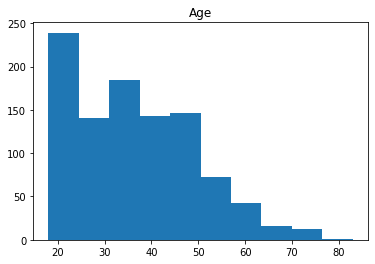

In [72]:
plt.hist(df['Age'])
plt.title('Age')
plt.show()

In [73]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['normalized_age'] = scaler.transform(df[['Age']])

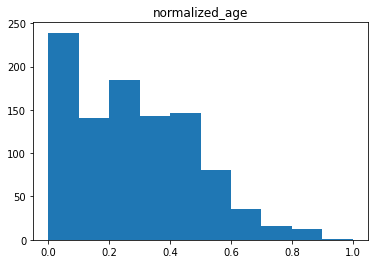

In [74]:
plt.hist(df['normalized_age'])
plt.title('normalized_age')
plt.show()

In [77]:
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['standardized_age'] = scaler.transform(df[['Age']])

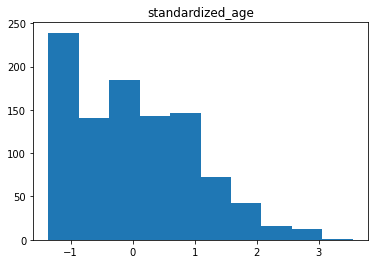

In [78]:
plt.hist(df['standardized_age'])
plt.title('standardized_age')
plt.show()

# Feature Engineering on text data

In [102]:
speeches = pd.read_csv('/content/inaugural_speeches.csv')

In [103]:
speeches.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [104]:
speeches['clean_text'] = speeches['text'].str.replace('[^a-zA-Z]', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [105]:
# Before 

speeches['text'][0]

'Fellow-Citizens of the Senate and of the House of Representatives:  AMONG the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the   th day of the present month. On the one hand, I was summoned by my country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years<U+0097>a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could n

In [106]:
# after

speeches['clean_text'][0]

'Fellow Citizens of the Senate and of the House of Representatives   AMONG the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order  and received on the   th day of the present month  On the one hand  I was summoned by my country  whose voice I can never hear but with veneration and love  from a retreat which I had chosen with the fondest predilection  and  in my flattering hopes  with an immutable decision  as the asylum of my declining years U      a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination  and of frequent interruptions in my health to the gradual waste committed on it by time  On the other hand  the magnitude and difficulty of the trust to which the voice of my country called me  being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications  could n

In [107]:
speeches['clean_text'] = speeches['clean_text'].str.lower()

In [108]:
speeches['clean_text'][0]

'fellow citizens of the senate and of the house of representatives   among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order  and received on the   th day of the present month  on the one hand  i was summoned by my country  whose voice i can never hear but with veneration and love  from a retreat which i had chosen with the fondest predilection  and  in my flattering hopes  with an immutable decision  as the asylum of my declining years u      a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination  and of frequent interruptions in my health to the gradual waste committed on it by time  on the other hand  the magnitude and difficulty of the trust to which the voice of my country called me  being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications  could n

In [110]:
# remove spaces
speeches['clean_text'] = speeches['clean_text'].str.strip()

In [111]:
speeches['clean_text'][0]

'fellow citizens of the senate and of the house of representatives   among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order  and received on the   th day of the present month  on the one hand  i was summoned by my country  whose voice i can never hear but with veneration and love  from a retreat which i had chosen with the fondest predilection  and  in my flattering hopes  with an immutable decision  as the asylum of my declining years u      a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination  and of frequent interruptions in my health to the gradual waste committed on it by time  on the other hand  the magnitude and difficulty of the trust to which the voice of my country called me  being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications  could n

## CountVectorizer: 
Convert a collection of text documents to a matrix of token counts.

In [124]:
cv_vect = CountVectorizer()
# Generate matrix of word vectors
bow_matrix = cv_vect.fit_transform(speeches['clean_text'])

In [125]:
bow_matrix

<58x9043 sparse matrix of type '<class 'numpy.int64'>'
	with 43643 stored elements in Compressed Sparse Row format>

In [126]:
print(bow_matrix.toarray()[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 1]
 [2 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [127]:
print(len(bow_matrix.toarray()[0]))

9043


In [129]:
cv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abandoned',
 'abandonment',
 'abate',
 'abdicated',
 'abeyance',
 'abhorring',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abnormal',
 'abode',
 'abolish',
 'abolished',
 'abolishing',
 'aboriginal',
 'aborigines',
 'abound',
 'abounding',
 'abounds',
 'about',
 'above',
 'abraham',
 'abreast',
 'abridging',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutism',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'abstain',
 'abstaining',
 'abstract',
 'abstractions',
 'absurd',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'academies',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accession',
 'accident',
 'accidental',
 'accidents',
 'acclaim',
 'accommodation',
 'accommodations',
 'accompanied',
 'accompany',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'accord',
 'accordance',
 'accorded',
 'ac

In [130]:
text_df = pd.DataFrame(bow_matrix.toarray(),columns=cv_vect.get_feature_names()).add_prefix('Counts_')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [131]:
text_df.head()

,Counts_abandon,Counts_abandoned,Counts_abandonment,Counts_abate,Counts_abdicated,Counts_abeyance,Counts_abhorring,Counts_abide,Counts_abiding,Counts_abilities,Counts_ability,Counts_abject,Counts_able,Counts_ably,Counts_abnormal,Counts_abode,Counts_abolish,Counts_abolished,Counts_abolishing,Counts_aboriginal,Counts_aborigines,Counts_abound,Counts_abounding,Counts_abounds,Counts_about,Counts_above,Counts_abraham,Counts_abreast,Counts_abridging,Counts_abroad,Counts_absence,Counts_absent,Counts_absolute,Counts_absolutely,Counts_absolutism,Counts_absorb,Counts_absorbed,Counts_absorbing,Counts_absorbs,Counts_abstain,...,Counts_writ,Counts_write,Counts_writers,Counts_writing,Counts_written,Counts_wrong,Counts_wrongdoing,Counts_wronged,Counts_wrongfully,Counts_wrongs,Counts_wrote,Counts_wrought,Counts_year,Counts_yearn,Counts_yearning,Counts_years,Counts_yes,Counts_yesterday,Counts_yesterdays,Counts_yet,Counts_yield,Counts_yielded,Counts_yielding,Counts_yields,Counts_york,Counts_yorktown,Counts_you,Counts_young,Counts_younger,Counts_youngest,Counts_your,Counts_yours,Counts_yourself,Counts_yourselves,Counts_youth,Counts_youthful,Counts_zeal,Counts_zealous,Counts_zealously,Counts_zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,9,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,7,0,0,0,7,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,2,0,0,0,2,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,3,0,0,0


## Td-Idf (Term Frequency Inverse Document Freqency):

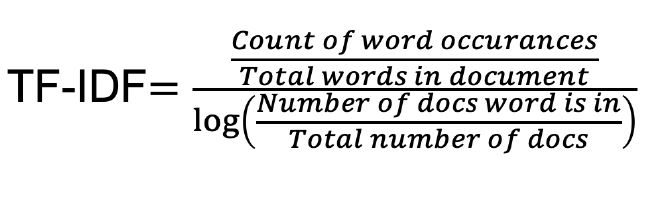


In [133]:
tv_vect = TfidfVectorizer()

bow_tv_matrix = tv_vect.fit_transform(speeches['clean_text'])

In [134]:
bow_tv_matrix.toarray()[:10]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01074176, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0076047 , 0.        ,
        0.01014736],
       [0.01074642, 0.        , 0.        , ..., 0.00588879, 0.00561252,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [135]:
tv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abandoned',
 'abandonment',
 'abate',
 'abdicated',
 'abeyance',
 'abhorring',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abnormal',
 'abode',
 'abolish',
 'abolished',
 'abolishing',
 'aboriginal',
 'aborigines',
 'abound',
 'abounding',
 'abounds',
 'about',
 'above',
 'abraham',
 'abreast',
 'abridging',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutism',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'abstain',
 'abstaining',
 'abstract',
 'abstractions',
 'absurd',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'academies',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accession',
 'accident',
 'accidental',
 'accidents',
 'acclaim',
 'accommodation',
 'accommodations',
 'accompanied',
 'accompany',
 'accomplish',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'accord',
 'accordance',
 'accorded',
 'ac

In [136]:
len(tv_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


9043

In [138]:
tv_df = pd.DataFrame(bow_tv_matrix.toarray(), columns= tv_vect.get_feature_names()).add_prefix('Tfidf_')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
tv_df.head()

,Tfidf_abandon,Tfidf_abandoned,Tfidf_abandonment,Tfidf_abate,Tfidf_abdicated,Tfidf_abeyance,Tfidf_abhorring,Tfidf_abide,Tfidf_abiding,Tfidf_abilities,Tfidf_ability,Tfidf_abject,Tfidf_able,Tfidf_ably,Tfidf_abnormal,Tfidf_abode,Tfidf_abolish,Tfidf_abolished,Tfidf_abolishing,Tfidf_aboriginal,Tfidf_aborigines,Tfidf_abound,Tfidf_abounding,Tfidf_abounds,Tfidf_about,Tfidf_above,Tfidf_abraham,Tfidf_abreast,Tfidf_abridging,Tfidf_abroad,Tfidf_absence,Tfidf_absent,Tfidf_absolute,Tfidf_absolutely,Tfidf_absolutism,Tfidf_absorb,Tfidf_absorbed,Tfidf_absorbing,Tfidf_absorbs,Tfidf_abstain,...,Tfidf_writ,Tfidf_write,Tfidf_writers,Tfidf_writing,Tfidf_written,Tfidf_wrong,Tfidf_wrongdoing,Tfidf_wronged,Tfidf_wrongfully,Tfidf_wrongs,Tfidf_wrote,Tfidf_wrought,Tfidf_year,Tfidf_yearn,Tfidf_yearning,Tfidf_years,Tfidf_yes,Tfidf_yesterday,Tfidf_yesterdays,Tfidf_yet,Tfidf_yield,Tfidf_yielded,Tfidf_yielding,Tfidf_yields,Tfidf_york,Tfidf_yorktown,Tfidf_you,Tfidf_young,Tfidf_younger,Tfidf_youngest,Tfidf_your,Tfidf_yours,Tfidf_yourself,Tfidf_yourselves,Tfidf_youth,Tfidf_youthful,Tfidf_zeal,Tfidf_zealous,Tfidf_zealously,Tfidf_zone
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.006548,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.037068,0.0,0.0,0.0,0.076056,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.057916,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.059043,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.010742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011338,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.006973,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.012698,0.0,0.0,0.012249,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005269,0.0,0.0,0.0,0.0,0.0,0.009416,0.0,0.0,0.0
3,0.013103,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.006910,0.009322,0.0,0.0,0.0,0.009322,0.0,0.0,0.012588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.013686,0.0,0.0,0.0000,0.01777,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.013305,0.0,0.0,0.0,0.0,0.0,0.0,0.043256,0.0,0.0,0.0,0.049308,0.0,0.0,0.0,0.0,0.0,0.012588,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008931,0.0,0.0,0.0,0.0,0.0,0.0,0.013072,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0101,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.014640,0.0,0.0,0.009415,0.0,0.0,0.0,0.011475,0.0,0.0,0.0,0.0,0.0,0.0,0.021318,0.0,0.0,0.0,0.024301,0.0,0.0,0.0,0.0,0.0,0.032570,0.0,0.0,0.0


## Resoucres:

**Articles**:

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/


**Books**:

**Introduction to Machine Learning , Adreas Muller**

**Python Feature Engineering Cookbook**